## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import time
import requests
from bs4 import BeautifulSoup
import requests
from tqdm import tqdm
import pickle
pd.options.display.max_rows = 999

## Yelp API Key

In [2]:
client_id = "oXRz7HWebFp6YdQ0YT3PMQ"
api_key = "Mm2MVQluEx7HWKjAMxJQT_KOSB_nKvEeQmjn19VS9PnsOBDoqtegFU1RoBXG0Lum415Eus2bKYuo-eb6mgMm1xV5nhwh3H5uhg-HJN39VFSMjIkwyRCbpLVv7ws7XXYx"

## Helper Functions

In [6]:
#api calls
def yelp_call(url_params, api_key):

    url = 'https://api.yelp.com/v3/businesses/search'
    headers = {'Authorization': 'Bearer {}'.format(api_key)}
    response = requests.get(url, headers=headers, params=url_params)
    data = response.json()['businesses']
    return data

In [3]:
#API call for 1000 restaurants
def all_results(url_params, api_key):
    url = 'https://api.yelp.com/v3/businesses/search'
    headers = {'Authorization': 'Bearer {}'.format(api_key)}
    response = requests.get(url, headers=headers, params=url_params)
    num = response.json()['total']
    print('{} total matches found.'.format(num))
    cur = 0
    results = []
    while cur < num and cur < 1000:
        url_params['offset'] = cur
        results.append(yelp_call(url_params, api_key))
#         time.sleep(1) #Wait a second
        cur += 50
    return results

In [4]:
#Params
term = 'Restaurants'
location = 'New York'
url_params = {  'term': term.replace(' ', '+'),
                'location': location.replace(' ', '+'),
                'limit' : 50
             }

## API Call for 1k Restaurants

In [7]:
#Getting info using function created previously
all_restaurants = all_results(url_params, api_key)
print(len(all_restaurants))

18900 total matches found.
20


In [8]:
all_restaurants

[[{'id': 'ehUuSk5gPTCQmwS_ubgKRA',
   'alias': 'upstate-craft-beer-and-oyster-bar-new-york-4',
   'name': 'Upstate Craft Beer & Oyster Bar',
   'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/RvnUVU7MF7DT0RzNL-EebQ/o.jpg',
   'is_closed': False,
   'url': 'https://www.yelp.com/biz/upstate-craft-beer-and-oyster-bar-new-york-4?adjust_creative=oXRz7HWebFp6YdQ0YT3PMQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=oXRz7HWebFp6YdQ0YT3PMQ',
   'review_count': 1847,
   'categories': [{'alias': 'seafood', 'title': 'Seafood'}],
   'rating': 4.5,
   'coordinates': {'latitude': 40.726373, 'longitude': -73.986557},
   'transactions': ['restaurant_reservation'],
   'price': '$$',
   'location': {'address1': '95 1st Ave',
    'address2': None,
    'address3': '',
    'city': 'New York',
    'zip_code': '10003',
    'country': 'US',
    'state': 'NY',
    'display_address': ['95 1st Ave', 'New York, NY 10003']},
   'phone': '+16467915400',
   'display_phone': '(646) 791-54

## Parse API for Relevant Info

In [22]:
#function to parse the data and keep only the parts of each entry that we need
def parse_api(data):
    parsed_data = []
    final_parsed_restaurants = []
    for i in range(len(data)):
        for j in range(50):
            parsed_data.append(data[i][j])
    
    #create a list with SQL tables columnns names
    for parsed_restaurant in parsed_data:
        if 'price' in parsed_restaurant.keys():
            final_parsed_restaurants.append({'restaurant_id': parsed_restaurant['id'],
                                             'restaurant_name': parsed_restaurant['name'],
                                             'price': parsed_restaurant['price'],
                                             'rating': parsed_restaurant['rating'],
                                             'review_count': parsed_restaurant['review_count'],
                                             'latitude': parsed_restaurant['coordinates']['latitude'],
                                             'longitude': parsed_restaurant['coordinates']['longitude'],
                                             'address': parsed_restaurant['location']['display_address']})
        else:
            final_parsed_restaurants.append({'restaurant_id': parsed_restaurant['id'],
                                             'restaurant_name': parsed_restaurant['name'],
                                             'price': "",'rating': parsed_restaurant['rating'],
                                             'review_count': parsed_restaurant['review_count'], 
                                             'latitude': parsed_restaurant['coordinates']['latitude'],
                                             'longitude': parsed_restaurant['coordinates']['longitude'],
                                             'address': parsed_restaurant['location']['display_address']})
    return final_parsed_restaurants

In [23]:
#call the function and return a list with only the columns names we need
parsed_restaurants_v1 = parse_api(all_restaurants)

In [24]:
len(parsed_restaurants_v1)

1000

In [25]:
parsed_restaurants_v1

[{'restaurant_id': 'ehUuSk5gPTCQmwS_ubgKRA',
  'restaurant_name': 'Upstate Craft Beer & Oyster Bar',
  'price': '$$',
  'rating': 4.5,
  'review_count': 1847,
  'latitude': 40.726373,
  'longitude': -73.986557,
  'address': ['95 1st Ave', 'New York, NY 10003']},
 {'restaurant_id': 'jjJc_CrkB2HodEinB6cWww',
  'restaurant_name': 'LoveMama',
  'price': '$$',
  'rating': 4.5,
  'review_count': 4938,
  'latitude': 40.7303859,
  'longitude': -73.9860613,
  'address': ['174 2nd Ave', 'New York, NY 10003']},
 {'restaurant_id': 'ETgJqJHV7BW6pIr9Ox74sA',
  'restaurant_name': 'Amélie',
  'price': '$$',
  'rating': 4.5,
  'review_count': 2654,
  'latitude': 40.7327,
  'longitude': -73.99766,
  'address': ['22 W 8th St', 'New York, NY 10011']},
 {'restaurant_id': 'UA2M9QFZghe-9th2KwLoWQ',
  'restaurant_name': 'Burger & Lobster',
  'price': '$$',
  'rating': 4.0,
  'review_count': 5426,
  'latitude': 40.74007,
  'longitude': -73.99344,
  'address': ['39 W 19th St', 'New York, NY 10011']},
 {'restaur

In [26]:
df = pd.DataFrame.from_dict(parsed_restaurants_v1)

In [27]:
df.head()

address   latitude  longitude price  rating  \
0    [95 1st Ave, New York, NY 10003]  40.726373 -73.986557    $$     4.5   
1   [174 2nd Ave, New York, NY 10003]  40.730386 -73.986061    $$     4.5   
2   [22 W 8th St, New York, NY 10011]  40.732700 -73.997660    $$     4.5   
3  [39 W 19th St, New York, NY 10011]  40.740070 -73.993440    $$     4.0   
4  [60 Furman St, Brooklyn, NY 11201]  40.702241 -73.995539    $$     4.0   

            restaurant_id                  restaurant_name  review_count  
0  ehUuSk5gPTCQmwS_ubgKRA  Upstate Craft Beer & Oyster Bar          1847  
1  jjJc_CrkB2HodEinB6cWww                         LoveMama          4938  
2  ETgJqJHV7BW6pIr9Ox74sA                           Amélie          2654  
3  UA2M9QFZghe-9th2KwLoWQ                 Burger & Lobster          5426  
4  q11TljTQd33XCWlVoPyRqg                       The Osprey           197

In [41]:
#exporting data to excel for partner to use
df.to_excel("Restaurant_1.xlsx")

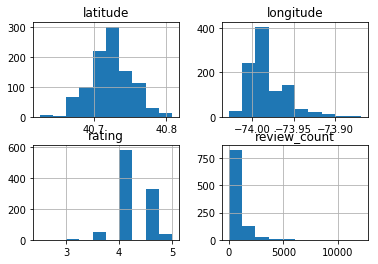

In [28]:
df.hist()
plt.show()

In [29]:
restaurant_id_list = list(df.restaurant_id)

In [30]:
restaurant_id_list

['ehUuSk5gPTCQmwS_ubgKRA',
 'jjJc_CrkB2HodEinB6cWww',
 'ETgJqJHV7BW6pIr9Ox74sA',
 'UA2M9QFZghe-9th2KwLoWQ',
 'q11TljTQd33XCWlVoPyRqg',
 'C2o3Iw-DXjoUJFgQIbiqkQ',
 'ysqgdbSrezXgVwER2kQWKA',
 'cTE0e96GYzet799EJeStoQ',
 'ax4INkzwL__-d_kGJfcA-w',
 '0CjK3esfpFcxIopebzjFxA',
 'xt4sa64WOrpJvZBDPNPNYg',
 'DDb_WRz8jPPHrTt5Fiu0og',
 'B3_K2kUVbYOU0VaLcj_LTw',
 's3jou_L_LVYGkNHiuhjlew',
 'I2lgw_7DUnwD92ND4PN-Ow',
 'tM8ZtEix8Bxg82AIKsHXcw',
 'CwOAKJdX8AMz5iAoA-ZEuA',
 'OCTiJwvjoK81WoDwsTkFvA',
 '96svxj2NIOrba2fBMZAqOQ',
 'XEugUtbw4rRmGr9S1XA-aQ',
 'nU4XBdvxDABXqZ6CnB8Dig',
 'hmdm-dO72hLsMQwQRcGEUQ',
 '-udRA8VRsQJoIaT-kxCrGg',
 'sCC7-hSdCkNPExejZT9BAQ',
 'Ms3CAGddVbgetiQrpzqxPQ',
 '0IFDnYf3bhqxJR6hVrG7Gw',
 'FizBsTIAJwNrImIG1mPDcg',
 'Me4TxTbPPQZQopW1wOGx5g',
 'kxykwx5qTWBhlMh18MQ82Q',
 '3xTQT7qjZJIxc-eBiFMerQ',
 'j9TdOBSQ1LRw8v3hW5fObQ',
 '3gqKLANaXNsHZnPDjKrcTg',
 'D8UbXnZ1Q9zR8-sPPpsJ-A',
 'nOjGNqPcu5jHRRElOndQqQ',
 'XipQLDbyTl5tsLlyzAWzug',
 'm1cJLpDN4B-_0hGgPfe5OA',
 '1x2hn3e9sCCZca1cnRTpEg',
 

## Test Scrape for 1 Restaurant

In [31]:
# creating the link to access the reviews
url_prefix = 'https://www.yelp.com/biz/'
url_suffix = '?rh_type=phrase'
test_id = 'ETgJqJHV7BW6pIr9Ox74sA'
full_url = url_prefix+test_id+url_suffix

In [32]:
full_url

'https://www.yelp.com/biz/ETgJqJHV7BW6pIr9Ox74sA?rh_type=phrase'

In [33]:
source = requests.get(full_url).text

In [34]:
source

'<!DOCTYPE HTML>\n\n<!--[if lt IE 7 ]> <html xmlns:fb="http://www.facebook.com/2008/fbml" class="ie6 ie ltie9 ltie8 no-js" lang="en"> <![endif]-->\n<!--[if IE 7 ]>    <html xmlns:fb="http://www.facebook.com/2008/fbml" class="ie7 ie ltie9 ltie8 no-js" lang="en"> <![endif]-->\n<!--[if IE 8 ]>    <html xmlns:fb="http://www.facebook.com/2008/fbml" class="ie8 ie ltie9 no-js" lang="en"> <![endif]-->\n<!--[if IE 9 ]>    <html xmlns:fb="http://www.facebook.com/2008/fbml" class="ie9 ie no-js" lang="en"> <![endif]-->\n<!--[if (gt IE 9)|!(IE)]><!--> <html xmlns:fb="http://www.facebook.com/2008/fbml" class="no-js" lang="en"> <!--<![endif]-->\n    <head>\n        <script>\n            (function() {\n                var main = null;\n\n                var main=function(){window.onerror=function(k,a,c,i,f){var j=(document.getElementsByTagName("html")[0].getAttribute("webdriver")==="true"||navigator.userAgent==="selenium");var h=f&&(f.name==="ServerSideRenderingError"||f.name==="CSRFallbackError");if(

In [35]:
soup = BeautifulSoup(source,'lxml')

In [36]:
print(soup.prettify())

<!DOCTYPE HTML>
<!--[if lt IE 7 ]> <html xmlns:fb="http://www.facebook.com/2008/fbml" class="ie6 ie ltie9 ltie8 no-js" lang="en"> <![endif]-->
<!--[if IE 7 ]>    <html xmlns:fb="http://www.facebook.com/2008/fbml" class="ie7 ie ltie9 ltie8 no-js" lang="en"> <![endif]-->
<!--[if IE 8 ]>    <html xmlns:fb="http://www.facebook.com/2008/fbml" class="ie8 ie ltie9 no-js" lang="en"> <![endif]-->
<!--[if IE 9 ]>    <html xmlns:fb="http://www.facebook.com/2008/fbml" class="ie9 ie no-js" lang="en"> <![endif]-->
<!--[if (gt IE 9)|!(IE)]><!-->
<html class="no-js" lang="en" xmlns:fb="http://www.facebook.com/2008/fbml">
 <!--<![endif]-->
 <head>
  <script>
   (function() {
                var main = null;

                var main=function(){window.onerror=function(k,a,c,i,f){var j=(document.getElementsByTagName("html")[0].getAttribute("webdriver")==="true"||navigator.userAgent==="selenium");var h=f&&(f.name==="ServerSideRenderingError"||f.name==="CSRFallbackError");if(j&&!h){document.body.innerHTML=

In [37]:
reviews_section = soup.find(class_='lemon--span__373c0__3997G',lang='en')


In [38]:
reviews_section

<span class="lemon--span__373c0__3997G" lang="en">Amazing happy hour, perfect wine flights and incredible appetizers! <br/><br/>Stopped here one afternoon before dinner with a friend and enjoyed a red wine flight and the goat cheese appetizer. The wine was unique and delightful and the flavors brought together in the goat cheese appetizer were wonderful. <br/><br/>The service was friendly and prompt (we sat at the bar) and once the lights were dimmed the ambiance was there too!</span>

In [39]:
reviews_section.text

'Amazing happy hour, perfect wine flights and incredible appetizers! Stopped here one afternoon before dinner with a friend and enjoyed a red wine flight and the goat cheese appetizer. The wine was unique and delightful and the flavors brought together in the goat cheese appetizer were wonderful. The service was friendly and prompt (we sat at the bar) and once the lights were dimmed the ambiance was there too!'

In [40]:
all_reviews_section = soup.find_all(class_='lemon--span__373c0__3997G',lang='en')
all_reviews_section

[<span class="lemon--span__373c0__3997G" lang="en">Amazing happy hour, perfect wine flights and incredible appetizers! <br/><br/>Stopped here one afternoon before dinner with a friend and enjoyed a red wine flight and the goat cheese appetizer. The wine was unique and delightful and the flavors brought together in the goat cheese appetizer were wonderful. <br/><br/>The service was friendly and prompt (we sat at the bar) and once the lights were dimmed the ambiance was there too!</span>,
 <span class="lemon--span__373c0__3997G" lang="en">Tried this place for the first time &amp; I plan on returning! My friend and I ordered the kale salad, roasted cauliflower, and the ravioli. All was very tasty and the serving size of the dishes, to us, exceeded our expectations. We barely finished because of how full we were! I'm hoping to return to try other dishes from the menu as the other pictures provided on Yelp look delicious.<br/><br/>We came to this establishment during what they call their "H

## Scrape 100 Reviews

In [ ]:
reviews=[]
for i in range(len(all_reviews_section)):
    reviews.append({i:all_reviews_section[i].text})

In [ ]:
reviews

In [ ]:
def scrape_list(list_id):
    reviews=[]
    for resto_id in tqdm(list_id):
        url_prefix = 'https://www.yelp.com/biz/'
        url_suffix = ['?rh_type=phrase','?start=20', '?start=40', '?start=60', '?start=80', '?start=100']
        for suf in url_suffix:
            test_id = resto_id
            full_url = url_prefix+test_id+suf
        
            source = requests.get(full_url).text
            soup = BeautifulSoup(source,'html')
            all_reviews_section = soup.find_all(class_='lemon--span__373c0__3997G',lang='en')
            time.sleep(1)
            for i in range(len(all_reviews_section)):
                reviews.append((test_id,all_reviews_section[i].text))
            with open('reviews_loop.pkl', 'wb') as f:
                pickle.dump(reviews, f)
    return reviews  

In [ ]:
full_reviews = scrape_list(restaurant_id_list)

In [ ]:
len(full_reviews)

In [ ]:
full_reviews

In [ ]:
import pickle
 
with open('reviews_v2.pkl', 'wb') as f:
    pickle.dump(full_reviews, f)

In [ ]:
len(tuple_reviews)

In [ ]:
data = pd.DataFrame(full_reviews,columns=['Restaurant_Id','Review'])

In [ ]:
data.to_csv('reviews.csv')